In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Input
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn import metrics

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import io
import os

from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from keras import regularizers
import time
import time

from keras import regularizers
from scipy import stats
import seaborn as sns
import pickle
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau

from keras.models import Model, load_model

from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#chargement des donnees 

df = pd.read_csv('/home/kodzo.apedo/Bureau/Visu/mesdonnees/mesdonnees_sans_degradation_gaussian.csv')

In [3]:
ds = df.values

In [4]:
RANDOM_SEED = 42 #used to help randomly select the data points
TEST_PCT = 0.30 

In [5]:
X = ds[:,0:34].astype(float)
Y = ds[:,34]

In [6]:
#Encodons la classe "Classe"

encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)

In [7]:
encoder

LabelEncoder()

In [8]:
encoder_Y

array([ 1,  1,  1, ..., 13, 13, 13])

In [9]:
# Redefinissons nos classe

dummy_y = np_utils.to_categorical(encoder_Y)

In [10]:
Yd = dummy_y

In [11]:
X_train, X_test, Yd_train, Yd_test = train_test_split(X, Yd, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [12]:
nb_class = 14 # Nombre de classe

nb_epoch = 500

batch_size = 1000

#Couche d'entrée

input_dim = X_train.shape[1] #numbre de colonne, 

encoding_dim = 500 # Dimension d'encodage
nb_class = 20 # Nombre de classe
hidden_dim = encoding_dim - 200 #i.e. 7

hidden_dim2 = hidden_dim - 200

#hidden_dim3 = hidden_dim + 30

learning_rate = 1e-7

In [13]:

#Debut du decompte du temps
start_time = time.time()

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation='tanh', 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation='tanh')(encoder)
#encoder = Dense(hidden_dim2, activation='tanh')(encoder)
encoder = Dense(input_dim, activation='relu')(encoder)


print("Temps d execution : %s secondes ---" %(time.time() - start_time))


Temps d execution : 0.06812191009521484 secondes ---


In [14]:

autoencoder = Model(inputs=input_layer, outputs=encoder)


autoencoder.summary()

autoencoder.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="ENCODER_DEGRA_GAUSS.h5",
                               save_best_only=True,
                               verbose=0)



history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test), callbacks = [cp]).history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 34)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               17500     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 34)                10234     
Total params: 178,034
Trainable params: 178,034
Non-trainable params: 0
_________________________________________________________________
Train on 195990 samples, validate on 83996 samples
Epoch 1/500
195990/195990 [==============================] - 8s 39us/step - loss: 0.4093 - acc: 0.8282 - val_loss: 0.2687 - val_acc: 0.9086
Epoch 2/500
195990/195990 [==============================] - 9s 45us/step - l

195990/195990 [==============================] - 8s 40us/step - loss: 0.1537 - acc: 0.9297 - val_loss: 0.1545 - val_acc: 0.8788
Epoch 53/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1566 - acc: 0.8927 - val_loss: 0.1545 - val_acc: 0.9258
Epoch 54/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1543 - acc: 0.9261 - val_loss: 0.1566 - val_acc: 0.9274
Epoch 55/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1562 - acc: 0.9086 - val_loss: 0.1544 - val_acc: 0.9298
Epoch 56/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1546 - acc: 0.9231 - val_loss: 0.1536 - val_acc: 0.9339
Epoch 57/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1544 - acc: 0.9170 - val_loss: 0.1627 - val_acc: 0.8740
Epoch 58/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1562 - acc: 0.9010 - val_loss: 0.1547 - val_acc: 0.8785
Epoch 59/500
195990/195990

195990/195990 [==============================] - 8s 40us/step - loss: 0.1546 - acc: 0.9059 - val_loss: 0.1563 - val_acc: 0.8831
Epoch 111/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1543 - acc: 0.9101 - val_loss: 0.1542 - val_acc: 0.9031
Epoch 112/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1552 - acc: 0.9113 - val_loss: 0.1536 - val_acc: 0.9256
Epoch 113/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1553 - acc: 0.9044 - val_loss: 0.1586 - val_acc: 0.9025
Epoch 114/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1575 - acc: 0.8804 - val_loss: 0.1608 - val_acc: 0.9099
Epoch 115/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1559 - acc: 0.8947 - val_loss: 0.1545 - val_acc: 0.9098
Epoch 116/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1548 - acc: 0.9053 - val_loss: 0.1549 - val_acc: 0.8952
Epoch 117/500
195990

Epoch 168/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1551 - acc: 0.8938 - val_loss: 0.1537 - val_acc: 0.9222
Epoch 169/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1535 - acc: 0.9254 - val_loss: 0.1557 - val_acc: 0.9044
Epoch 170/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1547 - acc: 0.9104 - val_loss: 0.1540 - val_acc: 0.9148
Epoch 171/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1560 - acc: 0.8918 - val_loss: 0.1569 - val_acc: 0.8909
Epoch 172/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1557 - acc: 0.9043 - val_loss: 0.1542 - val_acc: 0.9142
Epoch 173/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1577 - acc: 0.8978 - val_loss: 0.1555 - val_acc: 0.9241
Epoch 174/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1554 - acc: 0.9095 - val_loss: 0.1564 - val_acc: 0.9019
Epoch 

195990/195990 [==============================] - 8s 40us/step - loss: 0.1540 - acc: 0.9212 - val_loss: 0.1541 - val_acc: 0.9396
Epoch 226/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1549 - acc: 0.9157 - val_loss: 0.1554 - val_acc: 0.9154
Epoch 227/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1542 - acc: 0.9113 - val_loss: 0.1543 - val_acc: 0.9105
Epoch 228/500
195990/195990 [==============================] - 8s 39us/step - loss: 0.1581 - acc: 0.8662 - val_loss: 0.1630 - val_acc: 0.8192
Epoch 229/500
195990/195990 [==============================] - 8s 39us/step - loss: 0.1582 - acc: 0.8730 - val_loss: 0.1564 - val_acc: 0.8984
Epoch 230/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1558 - acc: 0.8988 - val_loss: 0.1551 - val_acc: 0.8901
Epoch 231/500
195990/195990 [==============================] - 8s 39us/step - loss: 0.1546 - acc: 0.9107 - val_loss: 0.1571 - val_acc: 0.9117
Epoch 232/500
195990

Epoch 283/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1565 - acc: 0.8902 - val_loss: 0.1546 - val_acc: 0.9031
Epoch 284/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1547 - acc: 0.9050 - val_loss: 0.1613 - val_acc: 0.8140
Epoch 285/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1550 - acc: 0.9012 - val_loss: 0.1542 - val_acc: 0.9102
Epoch 286/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1547 - acc: 0.9187 - val_loss: 0.1554 - val_acc: 0.8892
Epoch 287/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1577 - acc: 0.8760 - val_loss: 0.1609 - val_acc: 0.8656
Epoch 288/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1560 - acc: 0.8929 - val_loss: 0.1539 - val_acc: 0.9261
Epoch 289/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1566 - acc: 0.8924 - val_loss: 0.1609 - val_acc: 0.8208
Epoch 

195990/195990 [==============================] - 8s 41us/step - loss: 0.1555 - acc: 0.9043 - val_loss: 0.1552 - val_acc: 0.8319
Epoch 341/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1544 - acc: 0.9107 - val_loss: 0.1542 - val_acc: 0.8842
Epoch 342/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1536 - acc: 0.9217 - val_loss: 0.1601 - val_acc: 0.9248
Epoch 343/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1549 - acc: 0.9009 - val_loss: 0.1537 - val_acc: 0.8965
Epoch 344/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1546 - acc: 0.9038 - val_loss: 0.1552 - val_acc: 0.8880
Epoch 345/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1543 - acc: 0.9104 - val_loss: 0.1542 - val_acc: 0.9152
Epoch 346/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1570 - acc: 0.8953 - val_loss: 0.1557 - val_acc: 0.8834
Epoch 347/500
195990

Epoch 398/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1543 - acc: 0.9235 - val_loss: 0.1540 - val_acc: 0.9321
Epoch 399/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1544 - acc: 0.9164 - val_loss: 0.1556 - val_acc: 0.9235
Epoch 400/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1540 - acc: 0.9134 - val_loss: 0.1535 - val_acc: 0.9389
Epoch 401/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1561 - acc: 0.8865 - val_loss: 0.1541 - val_acc: 0.9084
Epoch 402/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1557 - acc: 0.9085 - val_loss: 0.1545 - val_acc: 0.9302
Epoch 403/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1543 - acc: 0.9231 - val_loss: 0.1604 - val_acc: 0.9033
Epoch 404/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1562 - acc: 0.9001 - val_loss: 0.1548 - val_acc: 0.9319
Epoch 

195990/195990 [==============================] - 8s 41us/step - loss: 0.1536 - acc: 0.9274 - val_loss: 0.1535 - val_acc: 0.9238
Epoch 456/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1544 - acc: 0.9152 - val_loss: 0.1539 - val_acc: 0.9209
Epoch 457/500
195990/195990 [==============================] - 8s 41us/step - loss: 0.1565 - acc: 0.8966 - val_loss: 0.1548 - val_acc: 0.9297
Epoch 458/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1545 - acc: 0.9082 - val_loss: 0.1555 - val_acc: 0.9047
Epoch 459/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1546 - acc: 0.9076 - val_loss: 0.1546 - val_acc: 0.9129
Epoch 460/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1545 - acc: 0.9099 - val_loss: 0.1534 - val_acc: 0.9317
Epoch 461/500
195990/195990 [==============================] - 8s 40us/step - loss: 0.1553 - acc: 0.9184 - val_loss: 0.1590 - val_acc: 0.8685
Epoch 462/500
195990

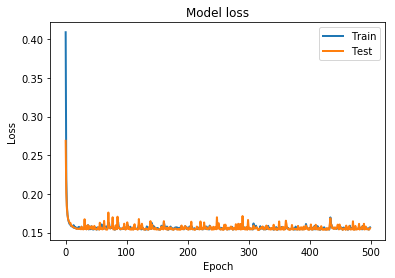

In [15]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

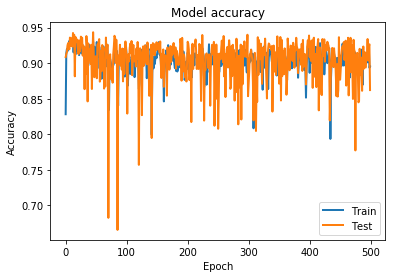

In [16]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [17]:
#Debut du decompte du temps
start_time = time.time()

model = Sequential()

model.add(autoencoder)
#model.add(Dropout(0.5))
model.add(Dense(500, activation ='relu'))
#model.add(Dropout(0.1))
model.add(Dense(300, activation ='tanh'))
#model.add(Dropout(0.1))
model.add(Dense(100, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(nb_class, activation ='sigmoid'))


model.compile(metrics=['accuracy'], loss = 'mse', 
              optimizer='adam')

model.summary()


checkpointer = ModelCheckpoint(filepath='DEGRA_GAUSSIEN.h5', 
                               verbose=2, save_best_only=True)



history = model.fit(X_train, Yd_train,
             validation_data=(X_test, Yd_test),
             epochs= nb_epoch,
             batch_size=batch_size,
             shuffle=True,
             verbose=2, callbacks=[checkpointer]).history


score, acc = model.evaluate(X_test, y = Yd_test, 
               batch_size = batch_size, 
               verbose = 1)




print("Temps d execution : %s secondes ---" %(time.time() - start_time))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 34)                178034    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               17500     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2020      
Total params: 377,954
Trainable params: 377,954
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_7 to have shape (20,) but got array with shape (14,)

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()